<a href="https://colab.research.google.com/github/livjab/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module4-clustering/Cell_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [3]:
# correlation matrix

df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [0]:
import math
from scipy.spatial import distance

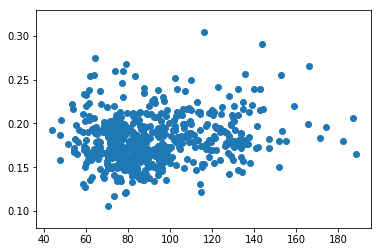

In [5]:
# low correlation between perimeter mean nad symmetry mean

plt.scatter(df.perimeter_mean, df.symmetry_mean);

In [6]:
df1 = df[["perimeter_mean", "symmetry_mean"]]
df1.columns=("x", "y")
df1.head()

,x,y
0,122.80,0.2419
1,132.90,0.1812
2,130.00,0.2069
3,77.58,0.2597
4,135.10,0.1809


In [7]:
# k=3

centroids = df1.sample(3)
centroids = centroids.rename(columns={"perimeter_mean": "x", "symmetry_mean": "y"})
#centroids = centroids.reset_index()
centroids

,x,y
133,102.00,0.1816
454,80.62,0.1799
387,88.37,0.1607


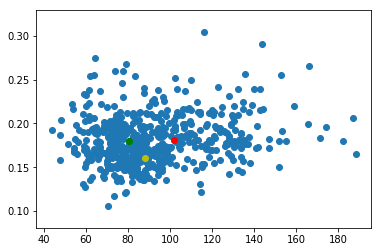

In [8]:
ax = plt.subplot(1,1,1)
ax.scatter(df1.x, df1.y)
ax.plot(centroids.iloc[0, 0], centroids.iloc[0, 1], "or");
ax.plot(centroids.iloc[1, 0], centroids.iloc[1, 1], "og");
ax.plot(centroids.iloc[2, 0], centroids.iloc[2, 1], "oy");

In [9]:
def find_nearest_centroid(df, centroids, iteration):
  distances = distance.cdist(df, centroids, 'euclidean')
  
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

first = find_nearest_centroid(df1, centroids, '1')
first.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,x,y,cluster_1
0,122.80,0.2419,0
1,132.90,0.1812,0
2,130.00,0.2069,0
3,77.58,0.2597,1
4,135.10,0.1809,0


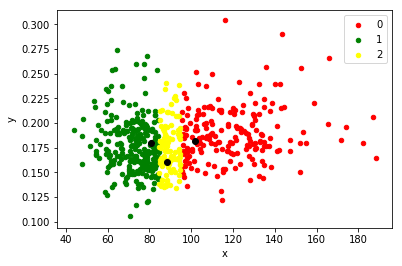

In [10]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', 
                 label=key, color=colors[key])
  plt.show()
  
plot_clusters(first, 'cluster_1', centroids)

In [11]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first, 'cluster_1')
centroids

,x,y
cluster_1,,
0,119.051364,0.189333
1,72.709242,0.177657
2,89.373551,0.174688


In [12]:

# Get Clusters for New Centroids
second = find_nearest_centroid(first, centroids, '2')

# Plot New Cluster
plot_clusters(second, 'cluster_2', centroids)

ValueError: ignored

In [28]:
first.shape

(569, 4)

In [29]:
centroids.shape

(3, 2)

In [0]:
# gonna try this with different code that doesnt rename dataframes 
# cause I'm having issues

In [0]:
from scipy.spatial.distance import cdist

def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)
  
  
df2 = find_nearest_centroid(df1, centroids)

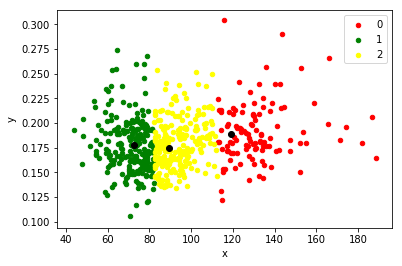

In [24]:
plot_clusters(df2, 'cluster9', centroids)

In [0]:
# gonna try with a library and come back to try individual iterations later

In [25]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)
labels = kmeans.labels_

print(labels)

[1 1 1 0 1 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 0 2 1 2 1 2 1 2 1 1 0 2 1 2 2 2
 0 2 2 2 0 1 2 2 1 0 2 0 2 0 2 0 1 2 0 1 2 0 0 0 0 2 0 0 2 0 0 0 0 1 0 1 2
 0 2 2 1 1 0 0 2 1 1 0 1 2 1 0 2 2 2 2 2 2 1 0 0 0 2 2 0 0 0 0 2 0 0 1 0 0
 0 2 0 0 0 0 2 2 1 0 1 1 2 2 2 2 1 2 1 0 2 2 2 1 0 0 0 2 0 0 2 0 2 0 0 0 2
 2 2 0 0 0 0 2 0 1 2 0 0 0 1 1 0 1 2 0 2 1 2 0 2 2 0 0 0 0 2 0 0 1 1 2 0 2
 0 1 0 0 0 2 0 0 0 2 0 2 1 1 2 0 1 1 2 0 2 0 2 2 2 1 0 1 1 2 2 0 0 1 1 2 2
 0 2 2 2 0 2 0 2 2 0 0 1 0 2 1 1 2 2 2 0 0 2 1 0 2 2 0 0 1 0 1 2 1 2 1 2 2
 2 1 2 1 2 2 1 0 2 0 0 2 0 1 0 1 0 0 1 2 2 1 0 1 2 2 0 0 0 0 0 2 2 0 0 0 2
 0 0 2 0 1 0 1 0 0 0 2 0 2 0 0 2 0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 0 2 2 2 2 0
 0 0 2 2 1 0 1 2 0 0 1 0 0 0 2 0 0 0 2 1 2 0 0 2 2 0 0 0 2 0 2 2 1 1 0 1 1
 2 2 1 1 2 2 0 2 2 0 0 0 0 0 2 2 0 2 0 1 0 0 2 1 0 2 2 0 0 0 1 0 2 0 0 0 2
 0 1 0 0 0 0 2 2 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 1 1 2 2 0 2 2 2 0 2 2 0
 1 0 1 2 2 1 0 1 0 2 0 2 0 2 0 0 2 1 2 0 2 2 2 0 1 0 0 0 2 0 0 0 2 2 0 2 0
 2 2 2 2 0 2 1 0 2 0 1 1 

In [26]:
new_series = pd.Series(labels)
df1['clusters'] = new_series.values

df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,x,y,cluster_1,clusters
0,122.80,0.2419,0,1
1,132.90,0.1812,0,1
2,130.00,0.2069,0,1
3,77.58,0.2597,1,0
4,135.10,0.1809,0,1


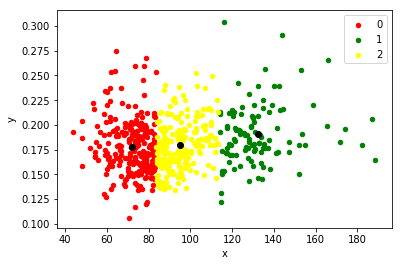

In [27]:
centroids1 = get_centroids(df1, 'clusters')
plot_clusters(df1, 'clusters', centroids1)

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.